# Housing Price Geographic HeatMap
Project 1, Group 5<br>
K. Harrison

In [4]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#set file paths
file1 = 'data/Sale_Prices_Zip.csv'
file2 = 'data/zipcodes.csv'

#read in files
df_raw = pd.read_csv(file1)
df_zips = pd.read_csv(file2)

In [23]:
#create new df from raw data to manipulate
df1 = df_raw

#keep relevant columns
df1 = df1.rename(columns={'RegionName':'ZIP'})

#grab lat/lng coordinates from df_zip by inner merge
df2 = pd.merge(df1, df_zips, how='inner')

#store latitude and longitude
LAT = df_zips['LAT']
LNG = df_zips['LNG']

#create list of months that will be used for analysis
#selected january (most current full-data month) and july (+6 month interval)
jan_months=['2009-01', '2010-01', '2011-01', '2012-01', '2013-01', '2014-01',
            '2015-01', '2016-01', '2017-01', '2018-01', '2019-01']

july_months = ['2009-07', '2010-07', '2011-07', '2012-07', '2013-07',
               '2014-07', '2015-07', '2016-07', '2017-07', '2018-07']

#create empty list of months
months=[]

#store months in chronological order (grab one from jan, then july, then repeat)
for x in range(len(jan_months)-1):
    months.append(jan_months[x])
    months.append(july_months[x])

#add current year data by grabbing last item in jan_month
months.append(jan_months[-1])


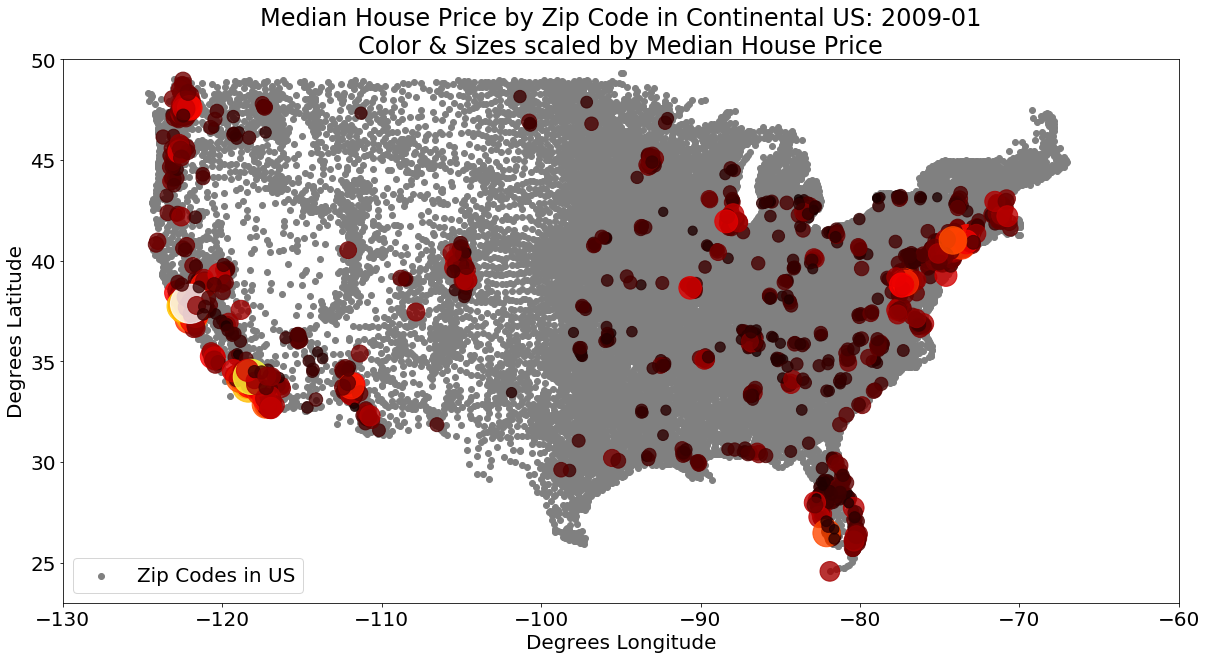

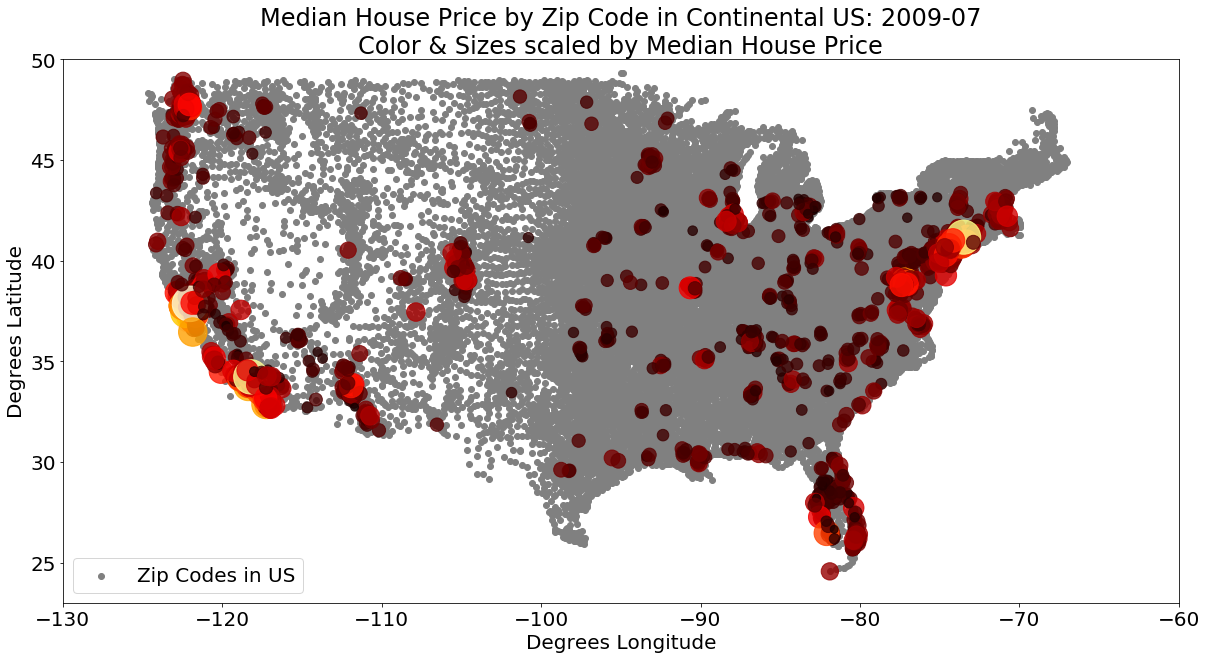

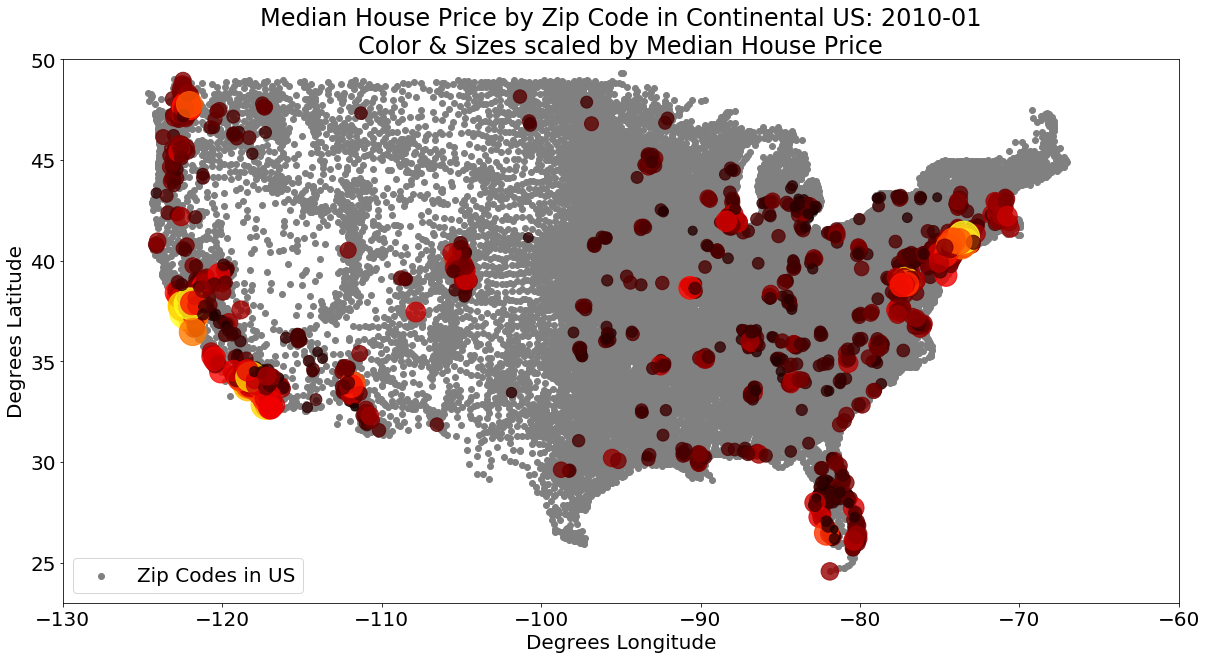

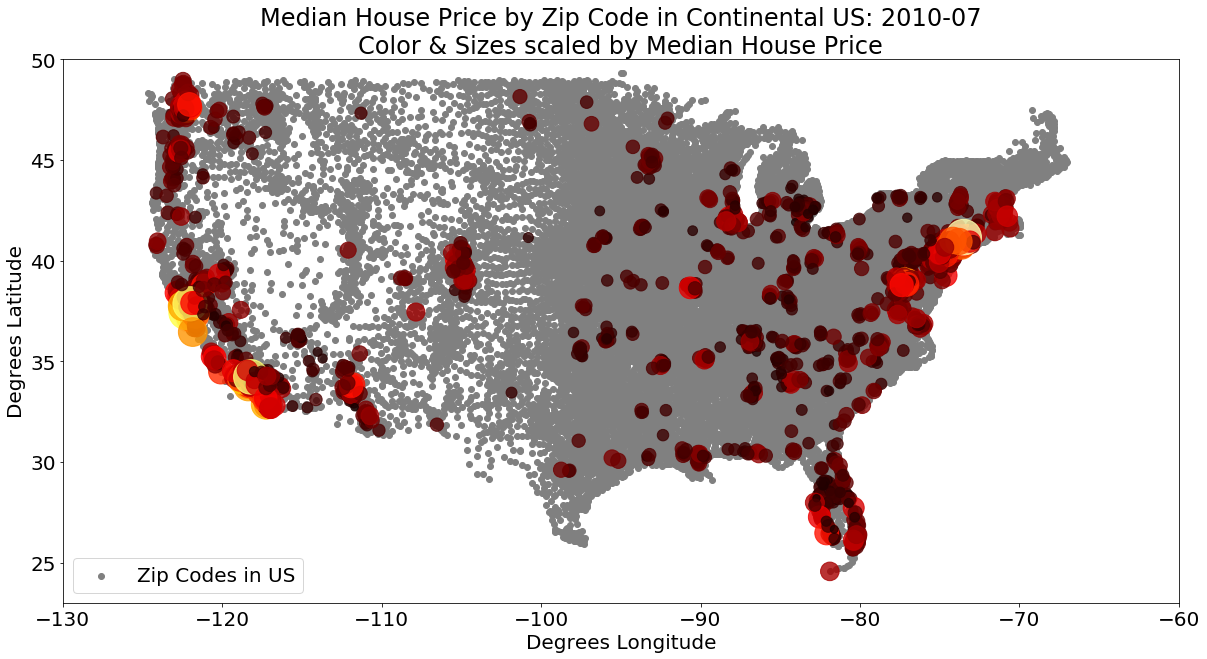

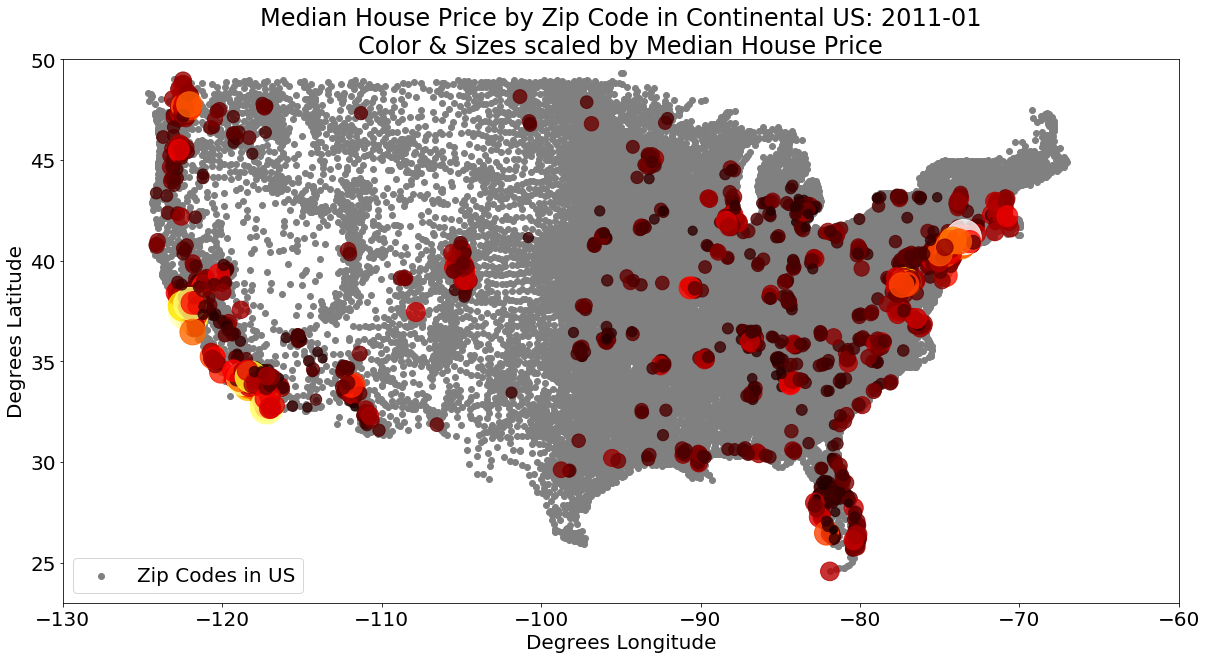

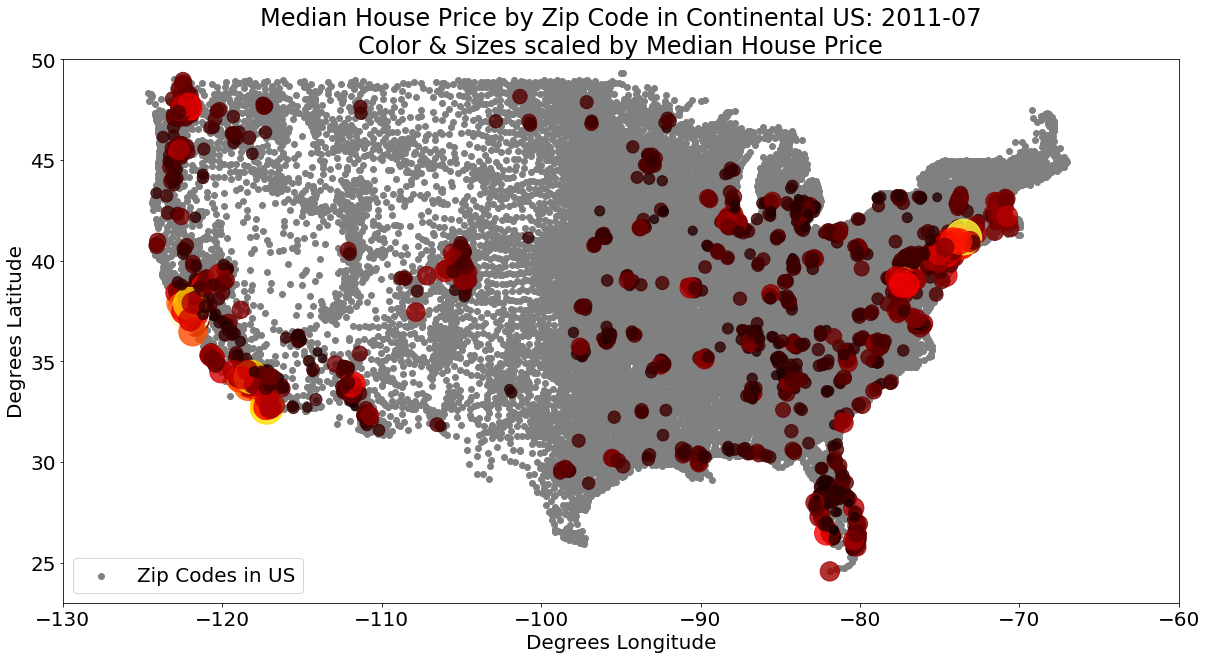

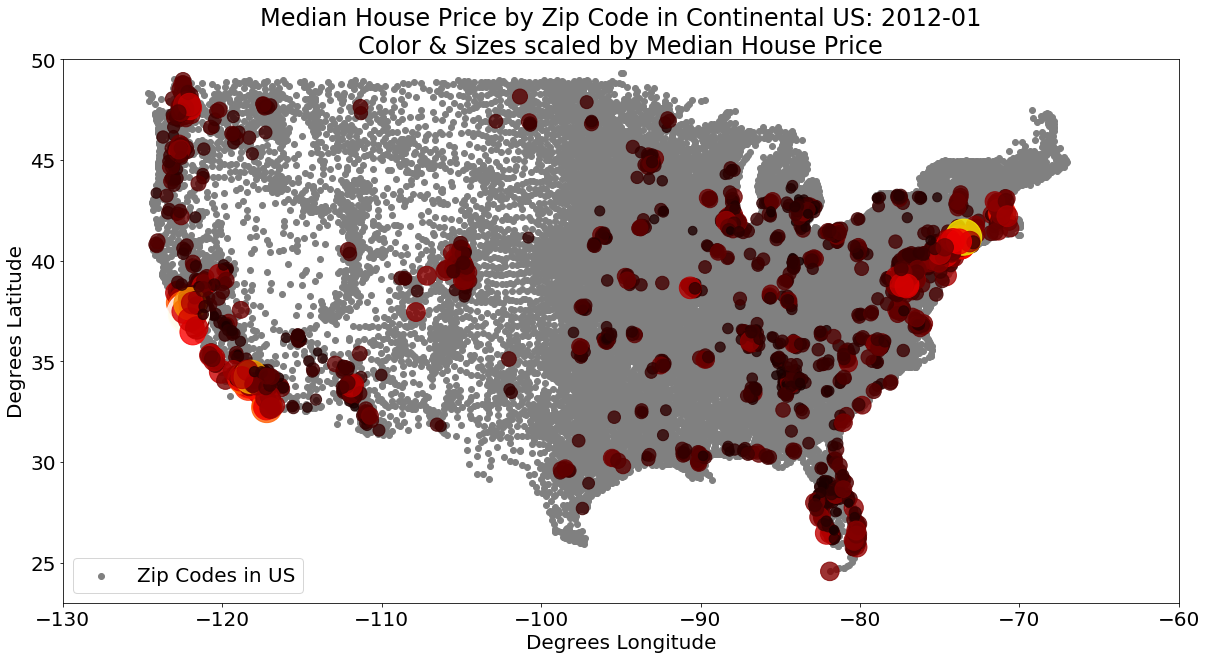

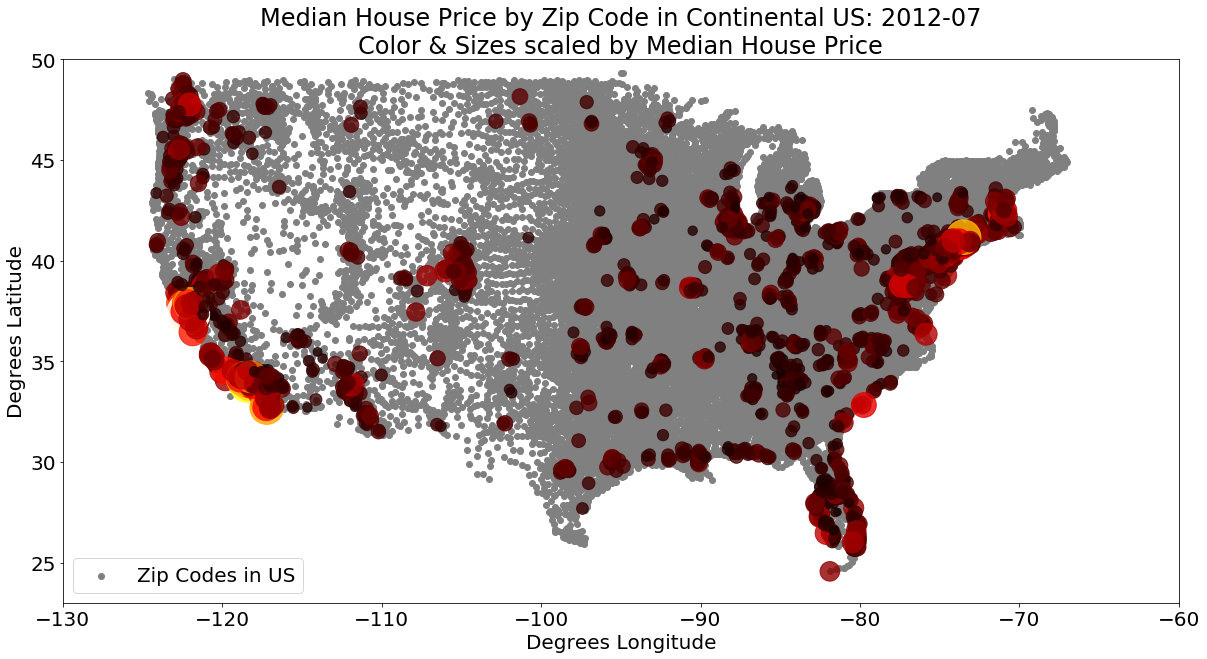

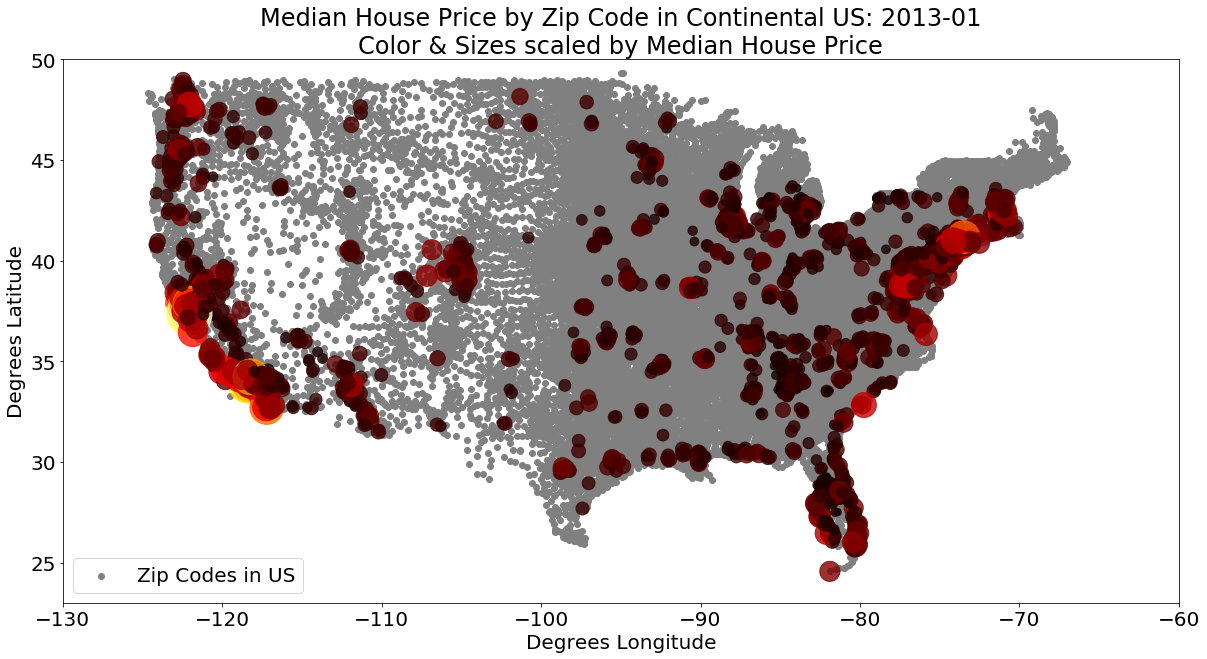

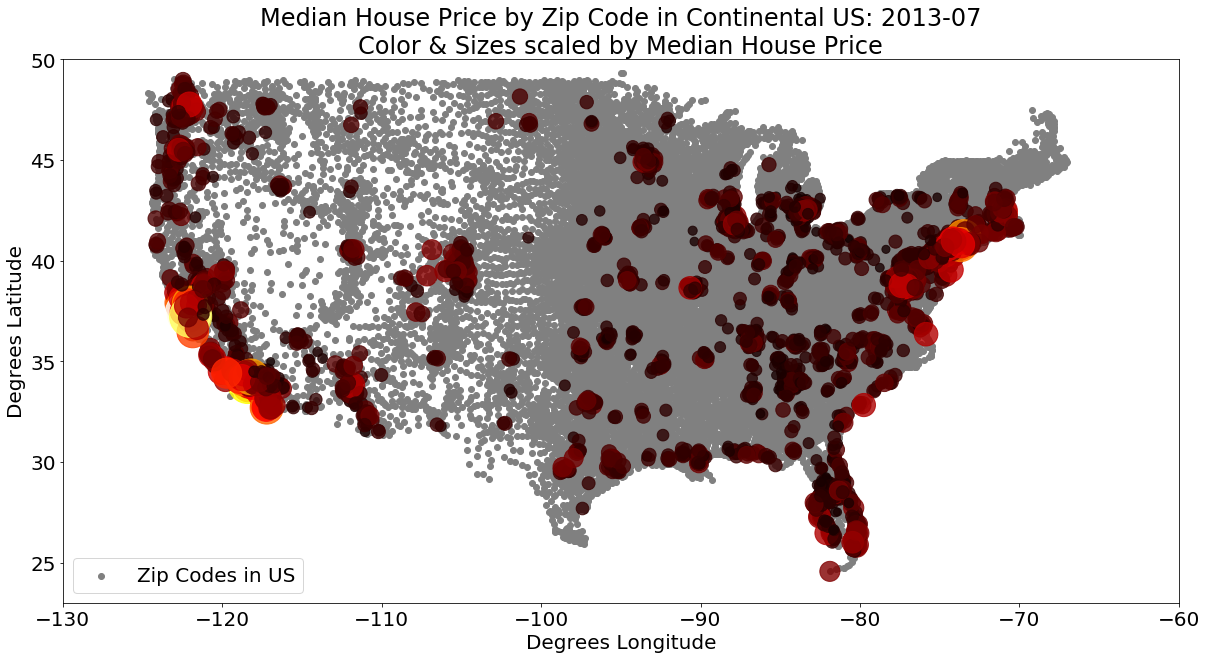

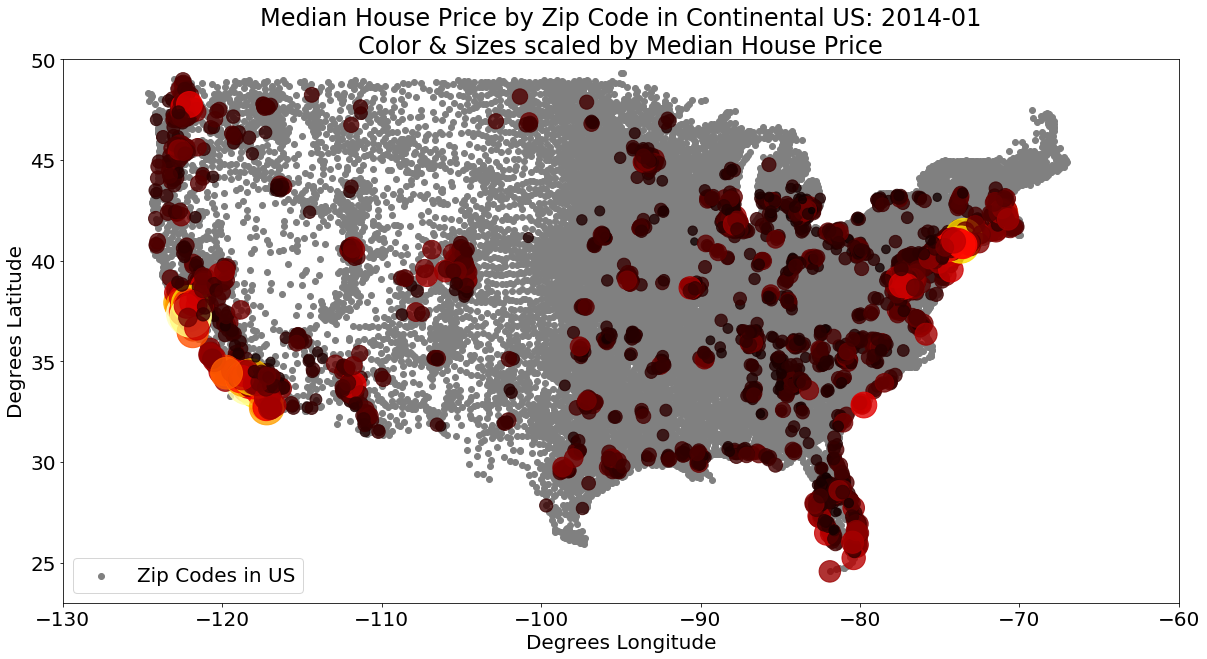

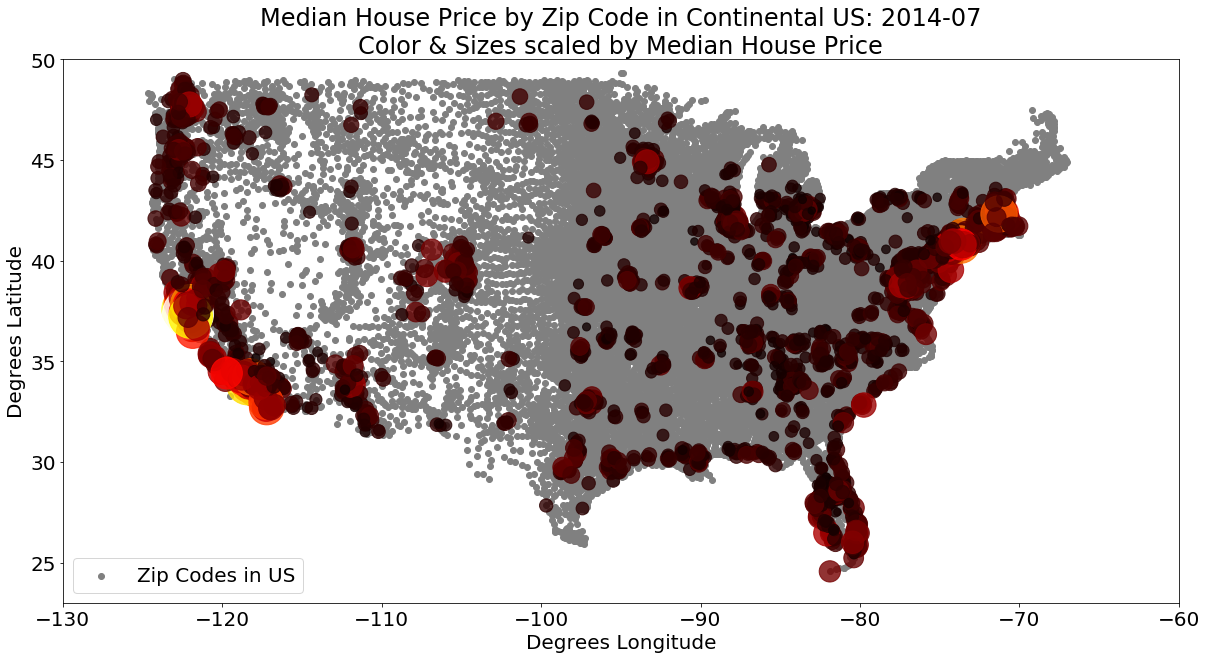

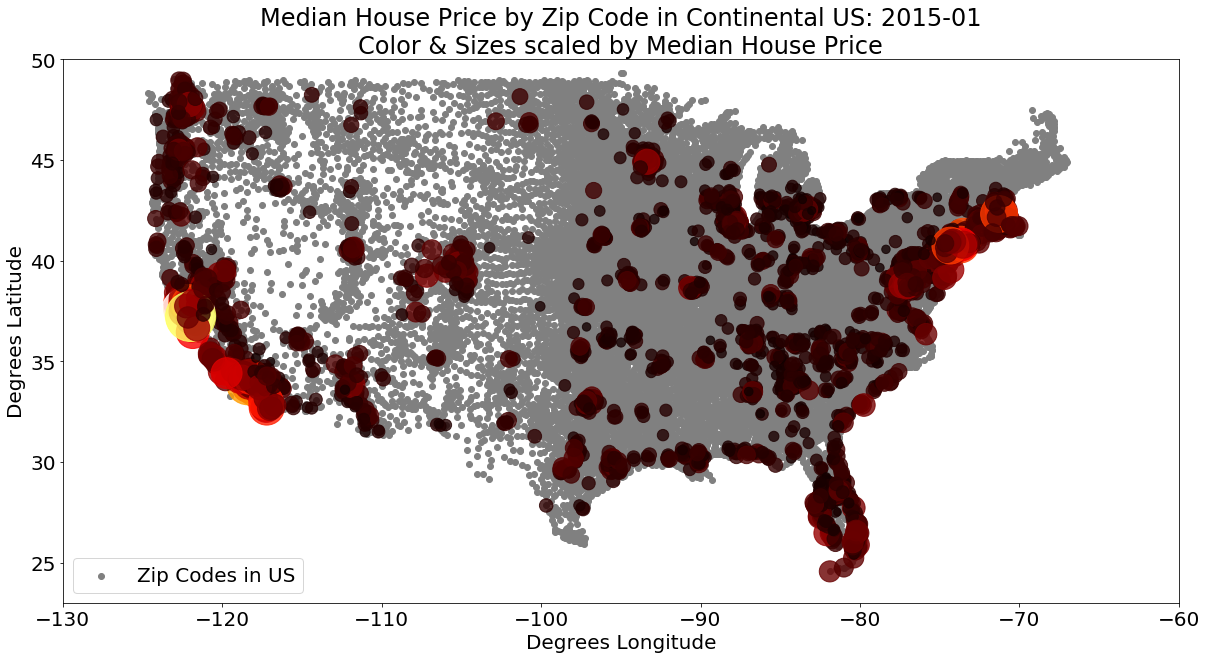

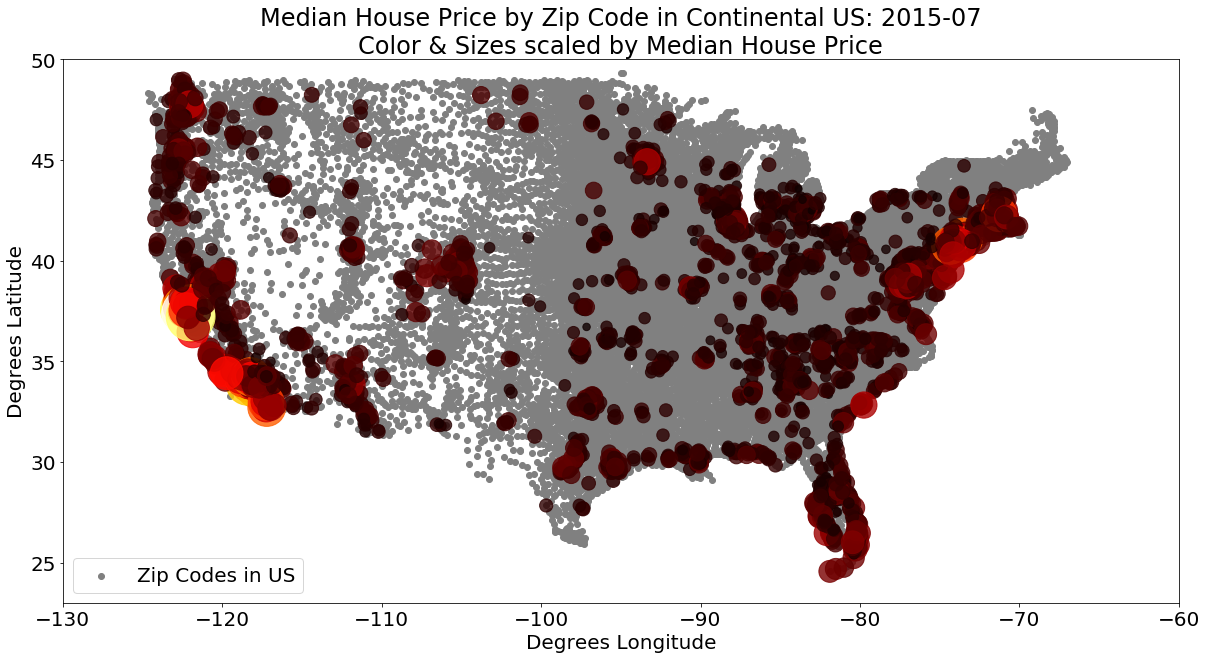

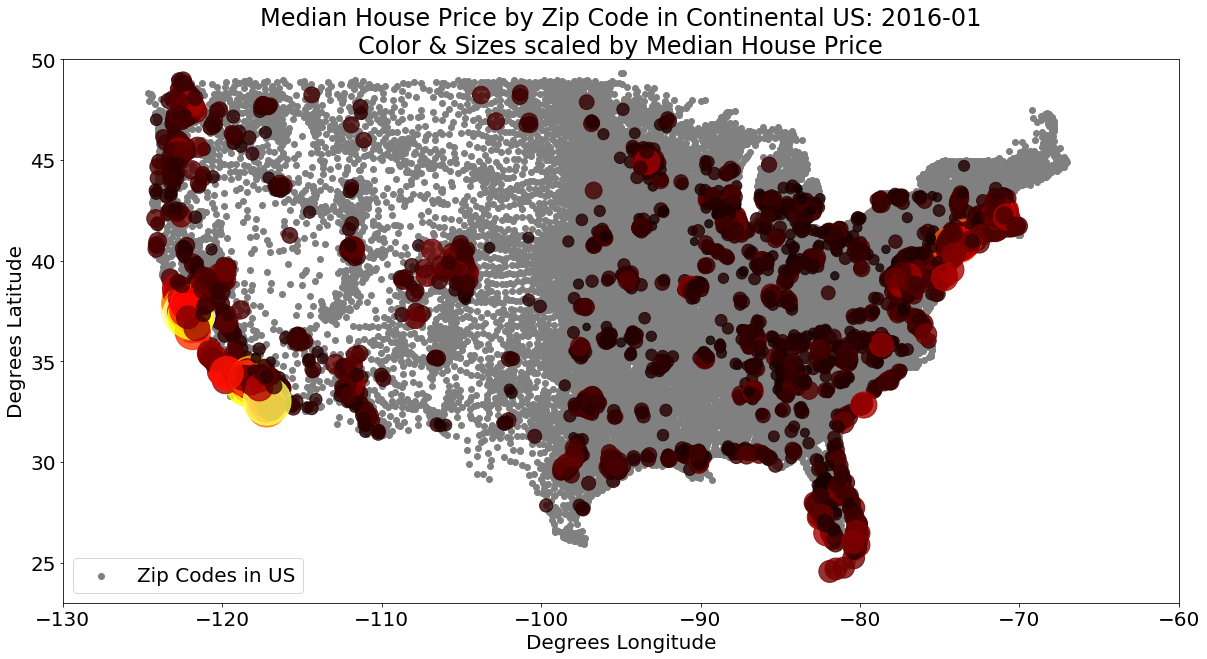

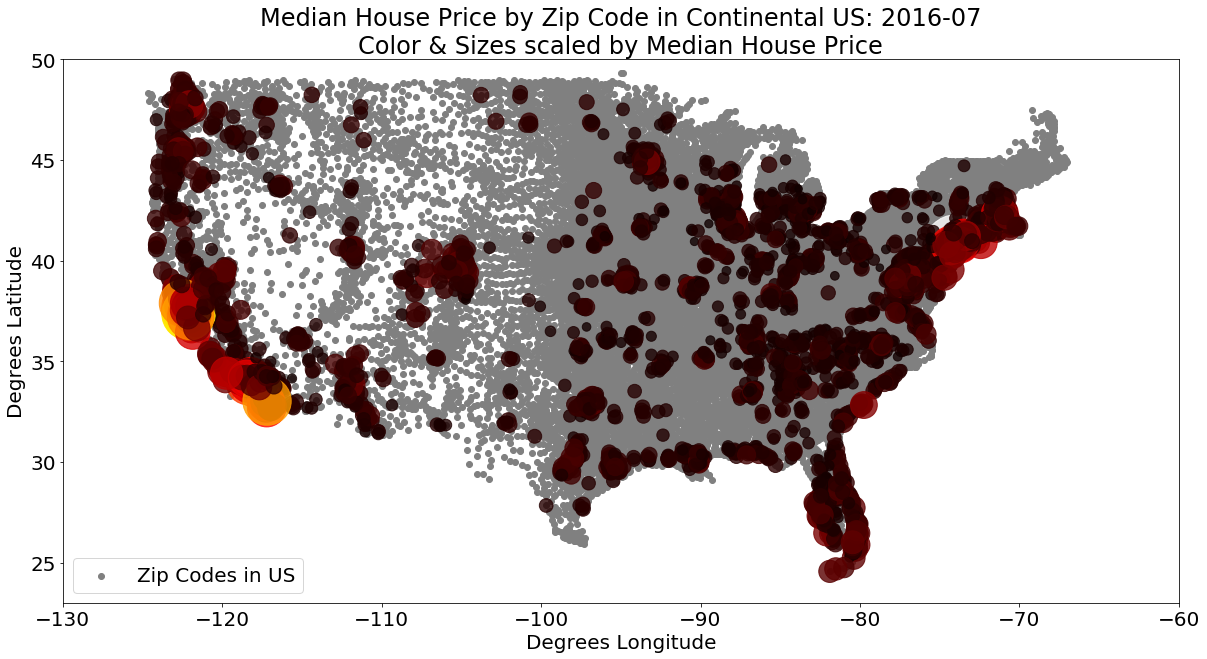

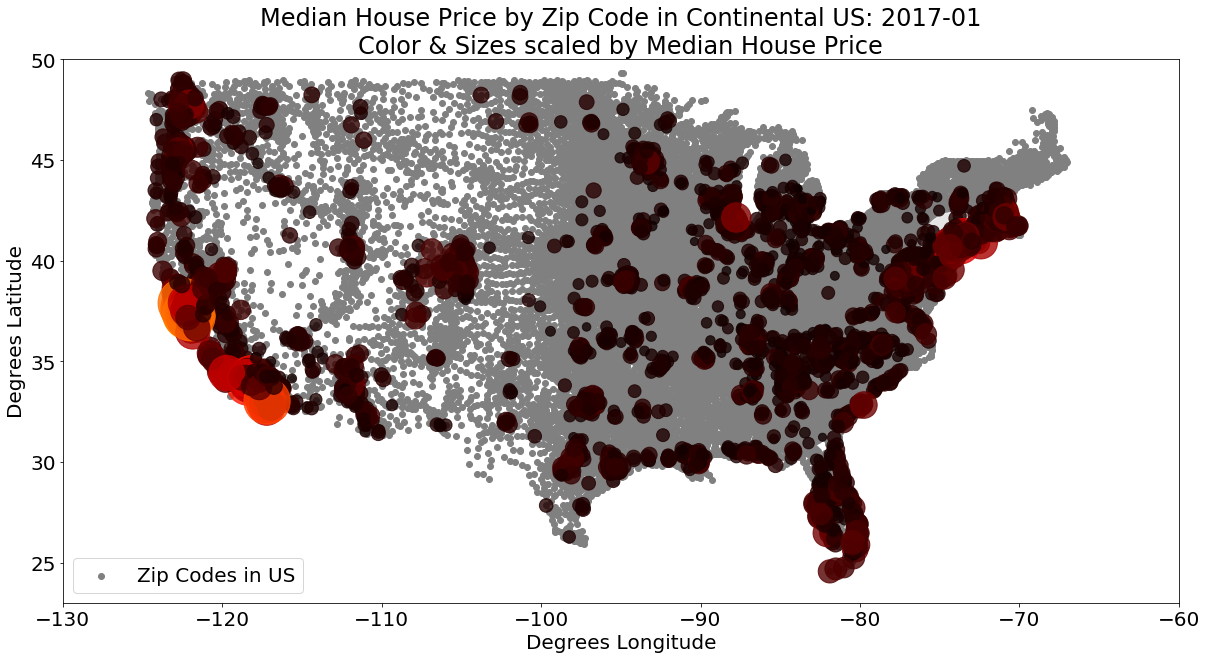

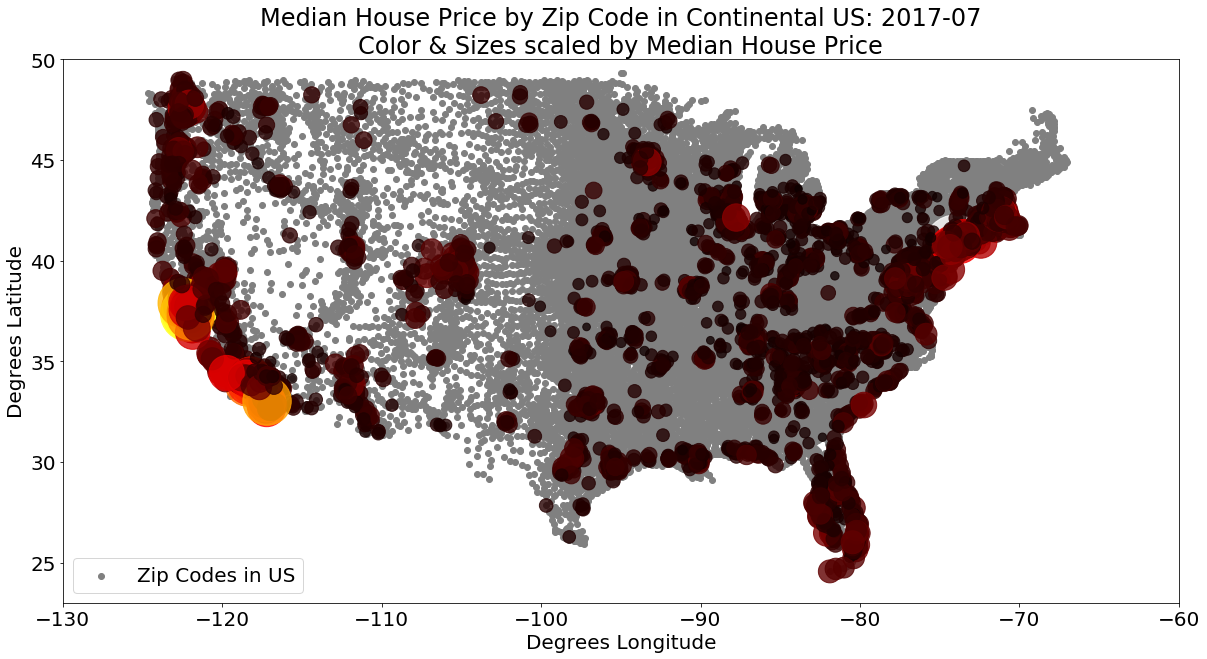

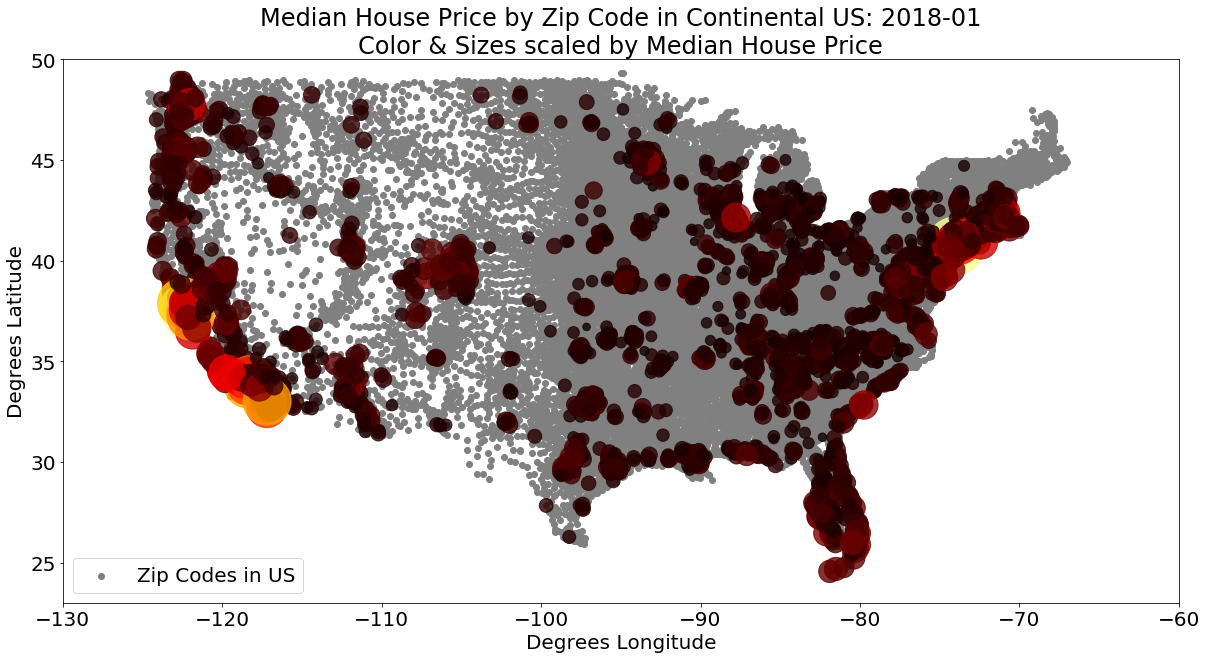

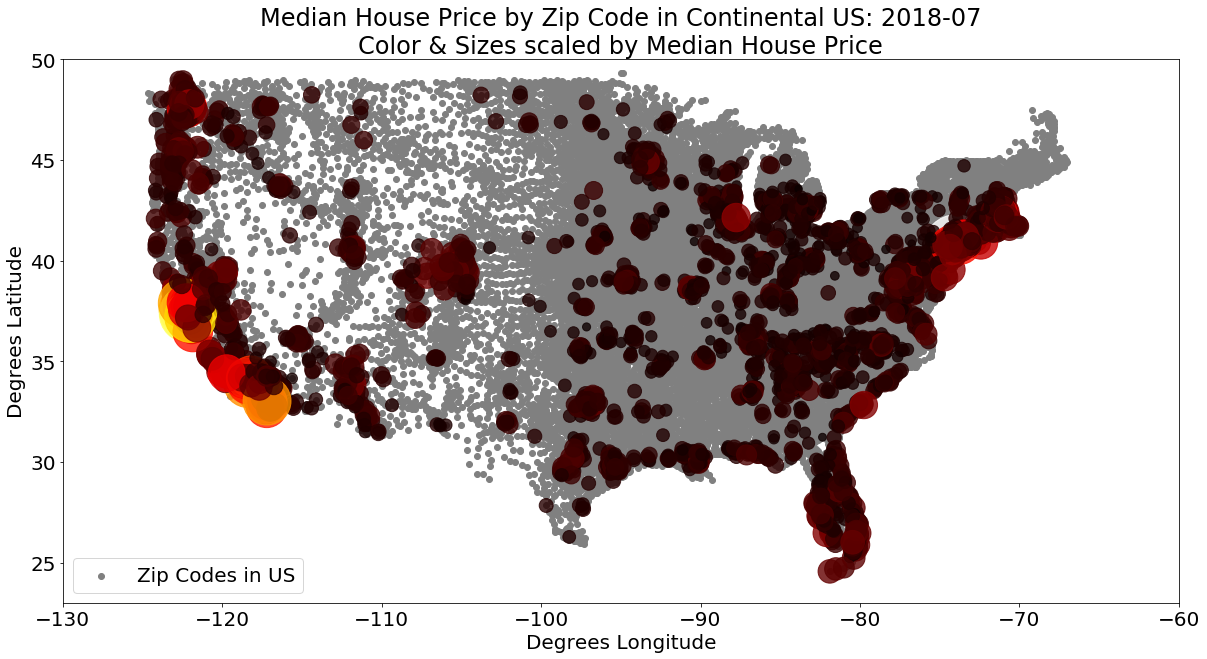

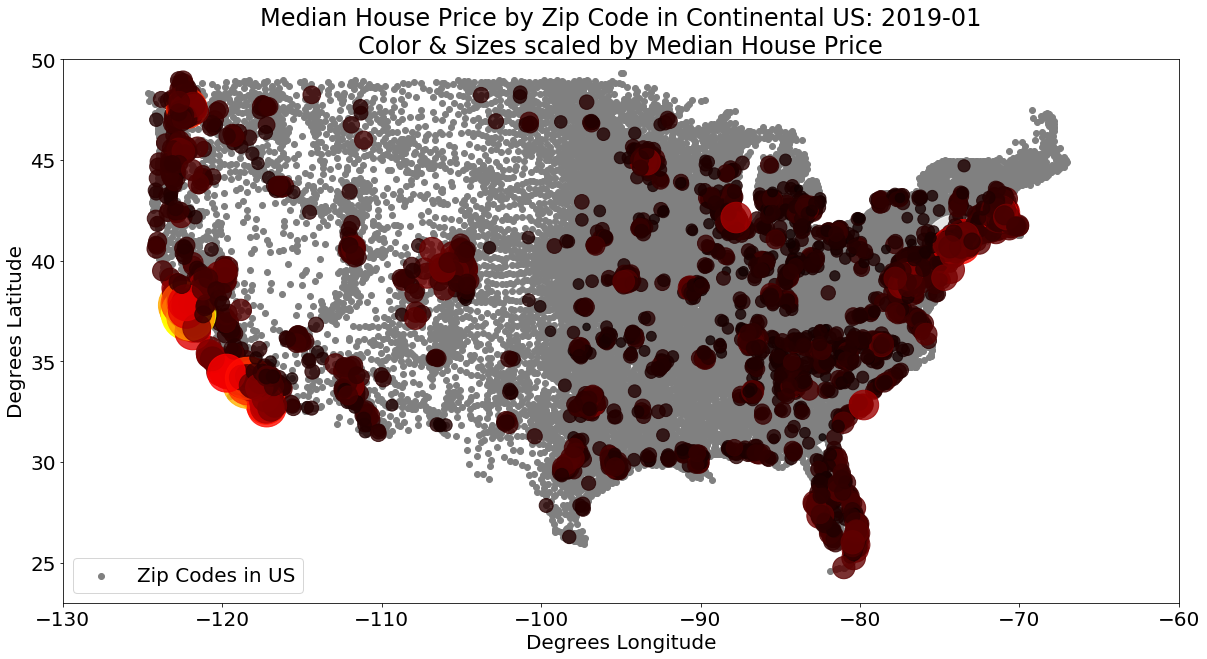

In [26]:
#loop through each month and plot data by coordinates
for month in months:
    size = df2[month]/1000 #scale bubble size
    plt.figure(figsize=(20,10)) #set fig size
    plt.scatter(LNG, LAT, color='grey', label='Zip Codes in US') #plot all zip codes to create a map
    plt.legend(loc='lower left', prop={'size': 20}) #add legend of zip codes
    #plot housing data size. scale by size and map color
    plt.scatter(df2['LNG'], df2['LAT'], c=df2[month], cmap='hot', s=size, alpha=.8)
    plt.xlim(-130, -60) #plot only contiguious US
    plt.ylim(23, 50) #plot only continguous US
    #add titles and labels and update font size
    plt.title(f'Median House Price by Zip Code in Continental US: {month}\nColor & Sizes scaled by Median House Price')
    plt.xlabel('Degrees Longitude')
    plt.ylabel("Degrees Latitude")
    plt.rcParams.update({'font.size': 20})
    #save fig and show
    plt.savefig(f'figures/MedianPriceHeatMap{month}.png')
    plt.show()